In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from urllib.request import urlopen

# County data

In [2]:
# Read in the final data
df = pd.read_csv("../../data/final/county_data.csv")
df

,fips,cancer_incidence_rate_per_100000,cancer_mortality_rate_per_100000,breast_cancer_incidence_rate_per_100000,breast_cancer_mortality_rate_per_100000,colorectal_cancer_incidence_rate_per_100000,colorectal_cancer_mortality_rate_per_100000,lung_cancer_incidence_rate_per_100000,lung_cancer_mortality_rate_per_100000,prostate_cancer_incidence_rate_per_100000,...,non_english_speaking,population_in_poverty_percent,population_over_16_unemployed_percent,population_over_25_no_high_school_diploma_percent,population_over_65_percent,population_under_17_percent,population_uninsured_percent,population_with_disability_percent,population_minority_percent,walkability_index
0,1001,490.1,163.48,129.9,21.59,49.5,15.19,67.8,48.43,133.2,...,1.3,22.665756,1.322813,7.679865,15.259081,23.621920,7.809270,17.358328,26.023113,5.483179
1,1003,452.4,165.47,128.1,22.20,40.4,13.93,70.0,47.25,88.4,...,1.8,16.681097,1.844802,6.790539,20.484770,21.527883,9.391678,14.024985,17.103015,6.812530
2,1005,NaN,182.94,NaN,NaN,44.1,15.42,63.1,54.49,146.2,...,2.8,35.822744,2.593303,17.969312,19.088148,20.866299,9.438184,16.618717,54.719092,5.156175
3,1007,467.3,187.60,140.7,22.05,47.0,14.30,78.3,54.26,112.7,...,1.4,25.610083,2.981139,13.658711,16.429785,20.488067,8.393671,16.751587,25.583266,5.241296
4,1009,432.0,176.72,130.0,20.36,36.7,14.17,70.3,53.94,96.9,...,3.3,23.589300,2.169509,11.839668,17.975933,23.152974,9.948922,14.828153,13.314865,4.674447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,72151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.385946
3238,72153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.541645
3239,78010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.280686
3240,78020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.179696


In [3]:
# Read county geojson from the plotly GitHub
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [7]:
def plot_counties(metric):
    # Grab the subset of data for this metric
    subset = df[["fips", metric]]
    subset = subset.dropna()
    
    # Convert FIPS to a string and pad with zeros
    subset["fips"] = subset["fips"].astype("string").str.zfill(5)
    
    # Calculate summary statistics
    minimum = subset[metric].min()
    maximum = subset[metric].max()
    mean = subset[metric].mean()
    std = subset[metric].std()

    # Plot choropleth
    fig = px.choropleth(
        subset,
        geojson=counties,
        locations="fips",
        color=metric,
        # Some series have extreme outliers so scale colors to 95% confidence interval
        range_color=(max(mean - 2 * std, minimum), min(mean + 2 * std, maximum)),
        color_continuous_scale="Viridis",
        scope="usa",
    )

    fig.update_layout(title_text=metric, title_x=0.5)
    fig.layout.coloraxis.colorbar.title = ""
    fig.update_layout(
        margin=dict(l=0, r=0, t=40, b=0),
    )

    fig.show("png")

# Cancer stats

In [16]:
df[["fips", "cancer_mortality_rate_per_100000"]].dropna().sort_values("cancer_mortality_rate_per_100000")

,fips,cancer_mortality_rate_per_100000
2452,47035,158.86
2232,41037,158.87
639,17077,158.88
820,19051,158.92
1344,27049,158.92
...,...,...
2397,46061,300.41
941,20095,300.64
2375,46017,333.99
2936,51640,372.85


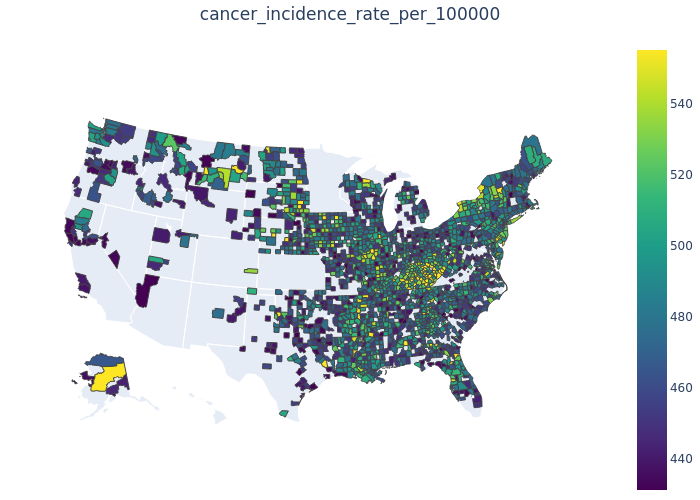

In [8]:
plot_counties("cancer_incidence_rate_per_100000")

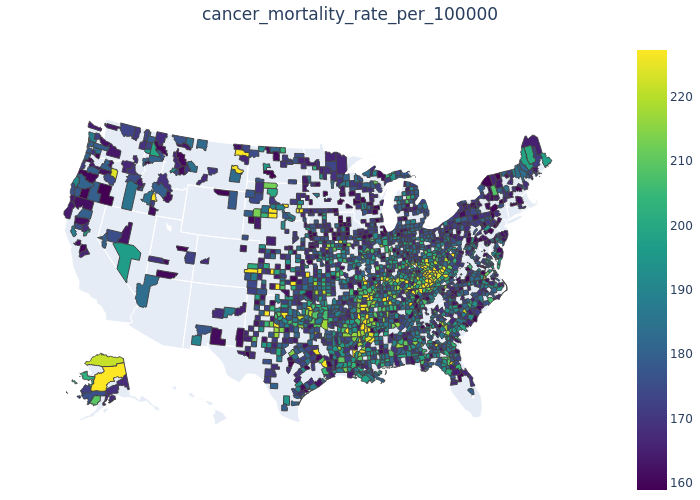

In [9]:
plot_counties("cancer_mortality_rate_per_100000")

# Demographics

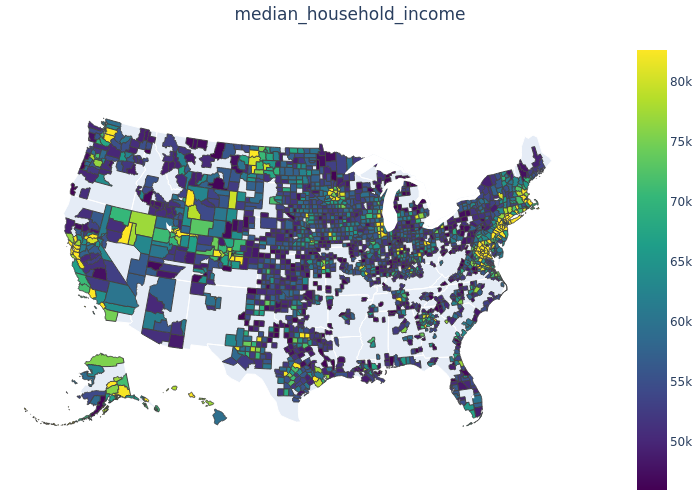

In [48]:
plot_counties("median_household_income")

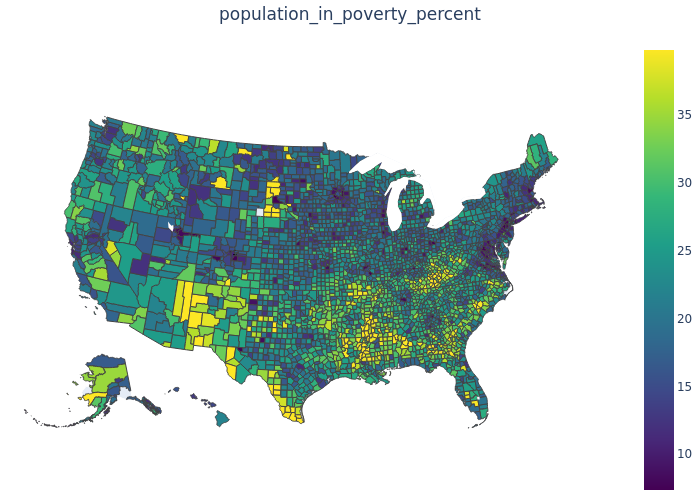

In [49]:
plot_counties("population_in_poverty_percent")

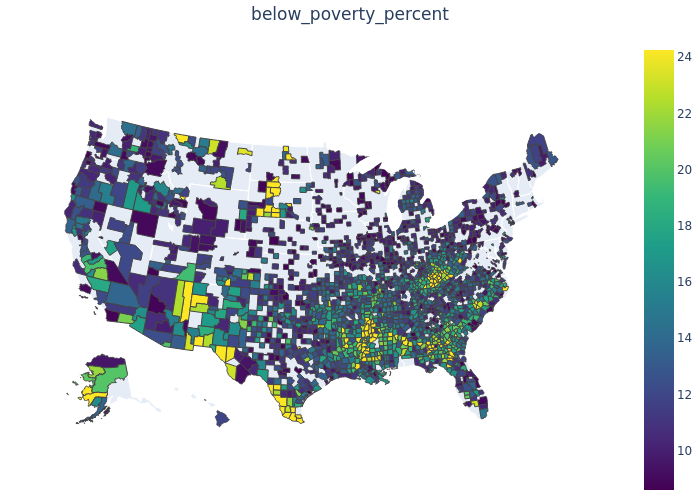

In [50]:
plot_counties("below_poverty_percent")

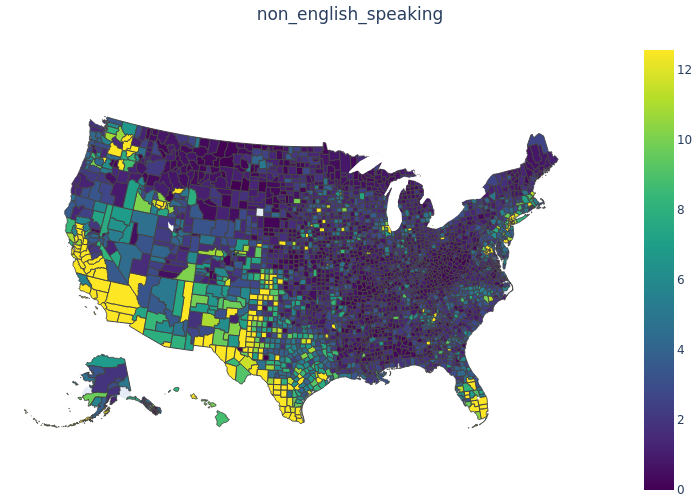

In [51]:
plot_counties("non_english_speaking")

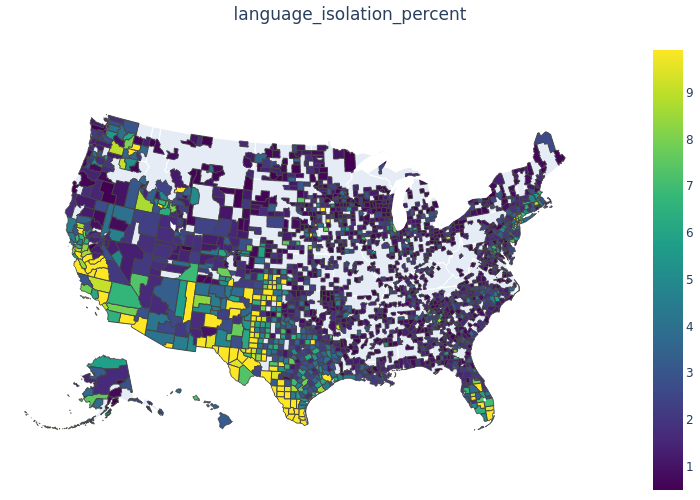

In [52]:
plot_counties("language_isolation_percent")

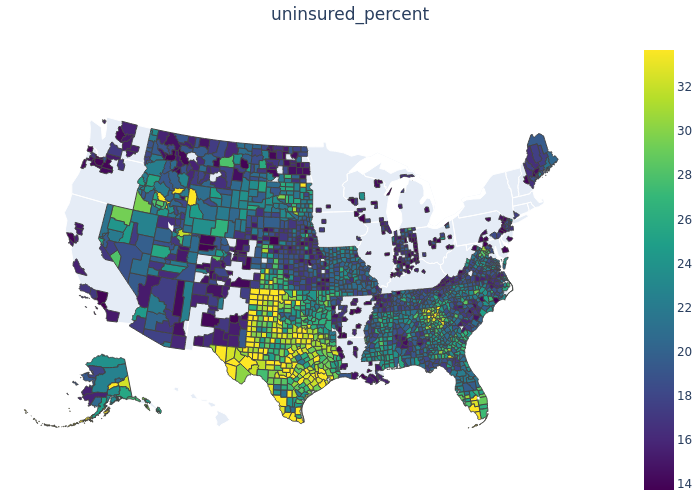

In [53]:
plot_counties("uninsured_percent")

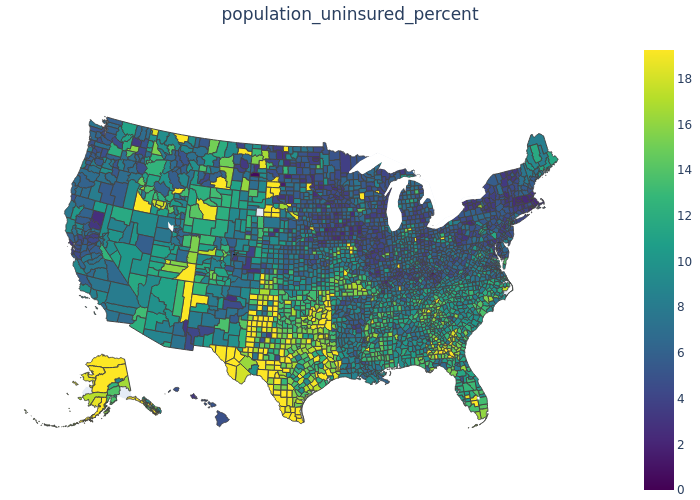

In [54]:
plot_counties("population_uninsured_percent")

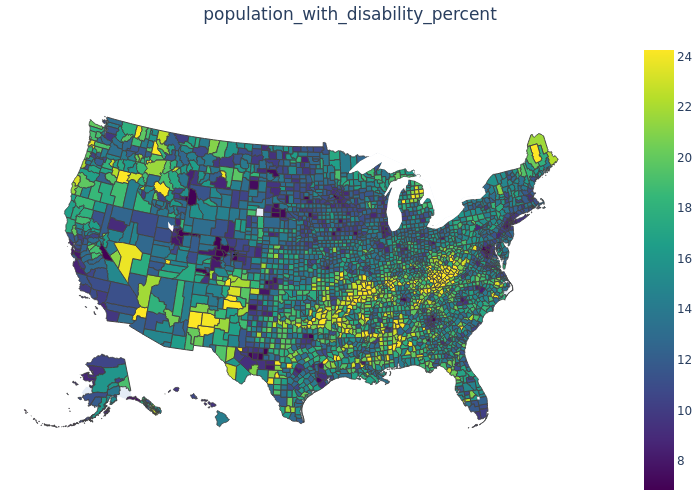

In [55]:
plot_counties("population_with_disability_percent")

# Potential causes

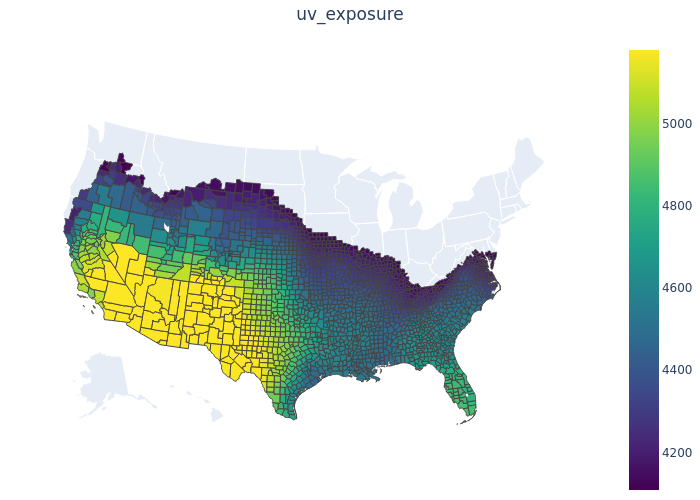

In [56]:
plot_counties("uv_exposure")

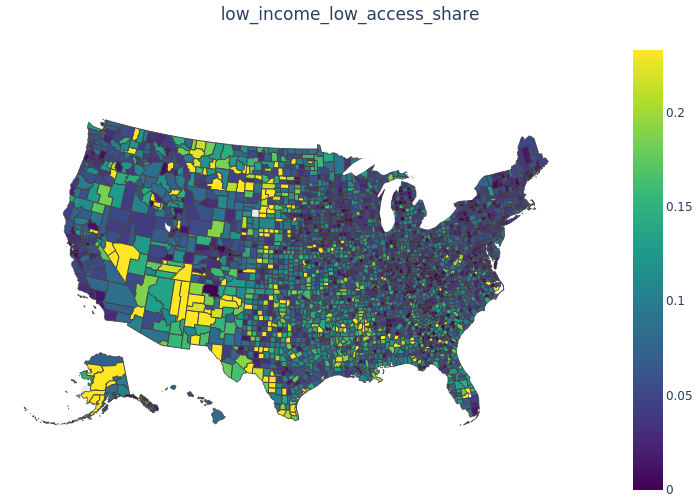

In [57]:
plot_counties("low_income_low_access_share")

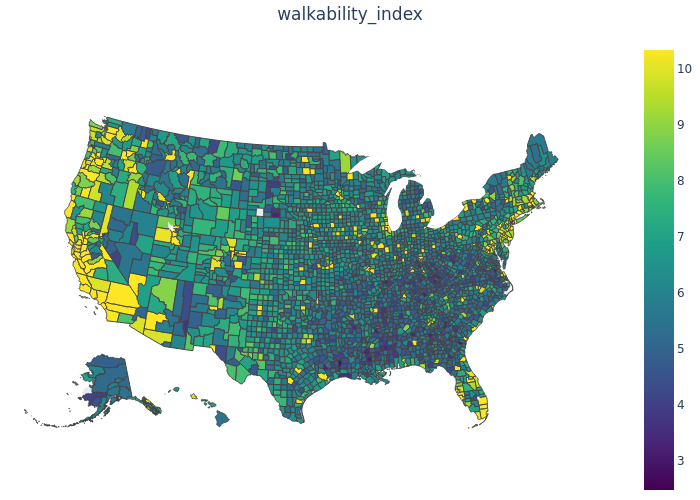

In [58]:
plot_counties("walkability_index")

In [59]:
df.columns

Index(['fips', 'cancer_incidence_rate_per_100000',
       'cancer_mortality_rate_per_100000',
       'breast_cancer_incidence_rate_per_100000',
       'breast_cancer_mortality_rate_per_100000',
       'colorectal_cancer_incidence_rate_per_100000',
       'colorectal_cancer_mortality_rate_per_100000',
       'lung_cancer_incidence_rate_per_100000',
       'lung_cancer_mortality_rate_per_100000',
       'prostate_cancer_incidence_rate_per_100000',
       'prostate_cancer_mortality_rate_per_100000', 'median_household_income',
       'language_isolation_percent', 'over_65_percent',
       'below_poverty_percent', 'uninsured_percent', 'uv_exposure',
       'low_income_low_access_share', 'non_english_speaking',
       'population_in_poverty_percent',
       'population_over_16_unemployed_percent',
       'population_over_25_no_high_school_diploma_percent',
       'population_over_65_percent', 'population_under_17_percent',
       'population_uninsured_percent', 'population_with_disability_pe